In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage
import csv
from skimage import img_as_float
from skimage import io, color, morphology

In [3]:
# point to license plate image (works well with custom crop function)
img = cv2.imread("13.jpg", 0)
cv2.imshow("input", img)
cv2.waitKey(0)

gray = cv2.resize(img, None, fx = 1, fy = 1, interpolation = cv2.INTER_CUBIC)
blur = cv2.GaussianBlur(img, (5,5), 0)
gray = cv2.medianBlur(img, 3)
# perform otsu thresh (using binary inverse since opencv contours work better with white text)
ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
cv2.imshow("Thresh image", thresh)
cv2.waitKey(0)


-1

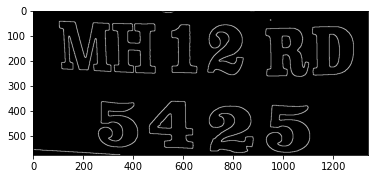

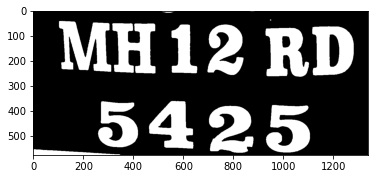

In [4]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
gradient=cv2.morphologyEx(thresh,cv2.MORPH_GRADIENT,kernel)
plt.imshow(gradient,cmap='gray')
plt.show()
# apply dilation 
dilation = cv2.dilate(thresh, kernel, iterations = 1)
plt.imshow(dilation,cmap='gray')
#cv2.imshow("dilation", dilation)
plt.show()
# find contours

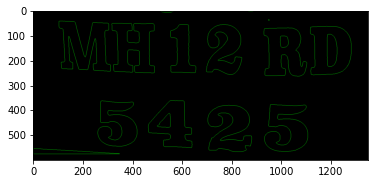

In [5]:
# find contours
try:
    contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
except:
    ret_img, contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
sorted_contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

#drawing these contours
blank = np.zeros((600, 1350, 3), dtype='uint8')
cv2.drawContours(blank, contours ,-1, (0,255,0), 1)

plt.imshow(blank,cmap='gray')
plt.show()
#cv2.imshow("contours drawn", blank)
#cv2.waitKey(0)
#cv2.destroyAllWindows()'''

roi_size: (20, 20)


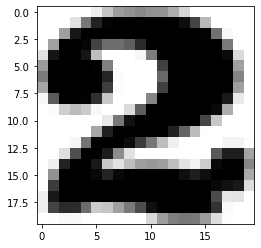

<class 'numpy.ndarray'>
<PIL.Image.Image image mode=1 size=35x35 at 0x18B76C4E9A0>
skel_size: (35, 35)


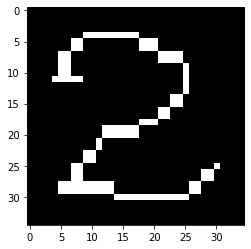

roi_size: (20, 20)


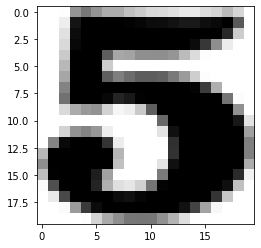

<class 'numpy.ndarray'>
<PIL.Image.Image image mode=1 size=35x35 at 0x18B76C4E9A0>
skel_size: (35, 35)


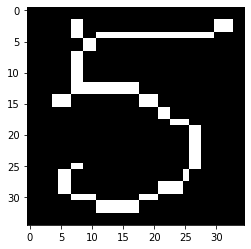

roi_size: (20, 20)


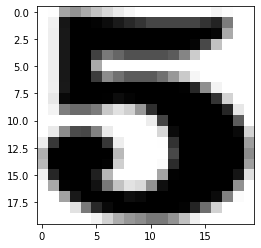

<class 'numpy.ndarray'>
<PIL.Image.Image image mode=1 size=35x35 at 0x18B76C4E9A0>
skel_size: (35, 35)


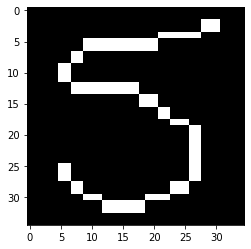

roi_size: (20, 20)


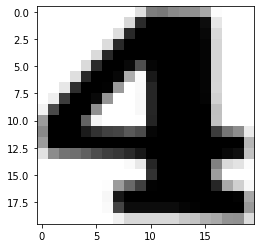

<class 'numpy.ndarray'>
<PIL.Image.Image image mode=1 size=35x35 at 0x18B76C4E9A0>
skel_size: (35, 35)


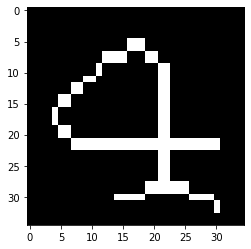

roi_size: (20, 20)


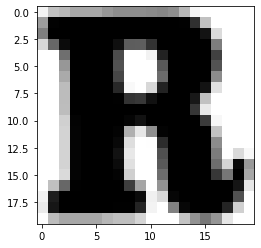

<class 'numpy.ndarray'>
<PIL.Image.Image image mode=1 size=35x35 at 0x18B76C4E9A0>
skel_size: (35, 35)


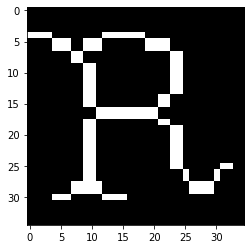

roi_size: (20, 20)


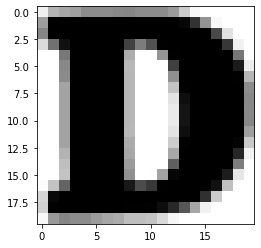

<class 'numpy.ndarray'>
<PIL.Image.Image image mode=1 size=35x35 at 0x18B76C4E9A0>
skel_size: (35, 35)


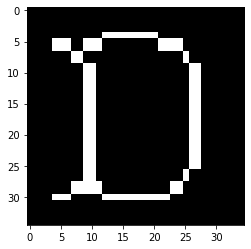

roi_size: (20, 20)


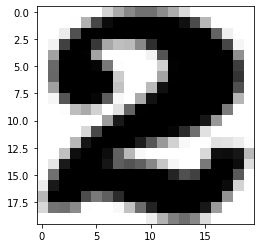

<class 'numpy.ndarray'>
<PIL.Image.Image image mode=1 size=35x35 at 0x18B76C4E9A0>
skel_size: (35, 35)


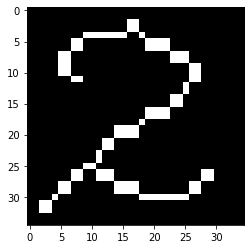

roi_size: (20, 20)


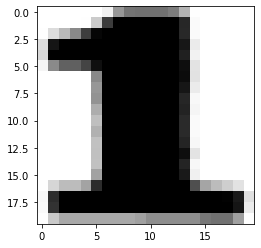

<class 'numpy.ndarray'>
<PIL.Image.Image image mode=1 size=35x35 at 0x18B76C4E9A0>
skel_size: (35, 35)


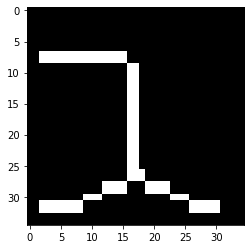

roi_size: (20, 20)


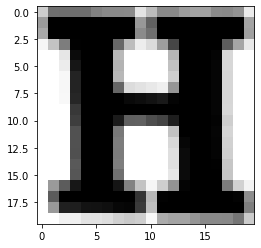

<class 'numpy.ndarray'>
<PIL.Image.Image image mode=1 size=35x35 at 0x18B76C4E9A0>
skel_size: (35, 35)


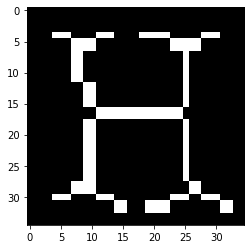

roi_size: (20, 20)


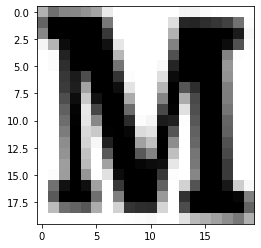

<class 'numpy.ndarray'>
<PIL.Image.Image image mode=1 size=35x35 at 0x18B76B7D340>
skel_size: (35, 35)


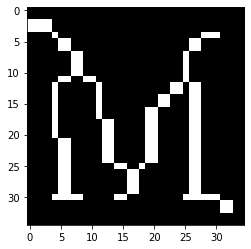

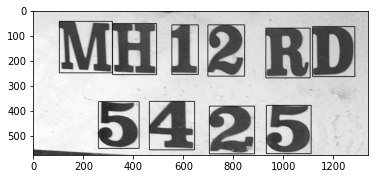

In [6]:
# create copy of image
from numpy import asarray
import sys
from skimage.exposure import histogram
from PIL import Image
im2 = gray.copy()

plate_num = ""
ROI_number = 0
# loop through contours and find letters in license plate
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for cnt in cnts:
    x,y,w,h = cv2.boundingRect(cnt)
    height, width = im2.shape
    
    # if height of box is not a quarter of total height then skip
    #if height / float(h) > 12: continue
    if height / float(h) > 122: continue
    ratio = h / float(w)
    # if height to width ratio is less than 1.5 skip
    if ratio < 0.5: continue
    area = h * w
    # if width is not more than 25 pixels skip
    #if width / float(w) > 15: continue
    if width / float(w) > 125: continue
    # if area is less than 100 pixels skip
    if area < 800: continue
    # draw the rectangle
   # im2 = im2.resize((35,35))
    rect = cv2.rectangle(im2, (x,y), (x+w+5, y+h+5), (0,255,0),2)
    roi = thresh[y-5:y+h+5, x-5:x+w+5]
    #roi = thresh[y:y, x:x]
    roi = cv2.bitwise_not(roi)
    roi = cv2.medianBlur(roi,5)
    
    roi = Image.fromarray(roi)
    roi=roi.resize((20,20),resample=3, box=None, reducing_gap=None)
    #roi.resize((50,50))
    print("roi_size:",roi.size)
    ROI_number = ROI_number + 1
    plt.imsave('extracted/skel_{}.png'.format(ROI_number), roi, cmap='gray')
    plt.imshow(roi, cmap='gray')
    plt.show()
    
    image = img_as_float(roi)
    image_binary = image < 0.5
    out_skeletonize = morphology.skeletonize(image_binary)
    out_thin = morphology.thin(image_binary)
    print(type(out_thin))
    #rows , cols = roi.shape
    #roi = roi[0:rows , 0:cols]
    #roi = roi.resize((35,35)) 
    #out_thin.resize((50,50), resample=image.NEAREST)

    #array to image
    im = Image.fromarray(out_thin)
    im=im.resize((35,35),resample=5, box=None, reducing_gap=None)
    print(im)
    print("skel_size:",im.size)
    plt.imshow(im)
    plt.show()
    plt.imsave('extracted/skel_{}.jpeg'.format(ROI_number), im, cmap='gray')
    #cv2.imwrite('extracted/skel_{}.png'.format(ROI_number),roi)
    
    #cv2.imwrite('tr_20X20/ROI_{}.png'.format(ROI_number),roi)
   # ROI_number = ROI_number + 1
#print("features")
plt.imshow(im2, cmap='gray')
plt.show()

# feature extraction

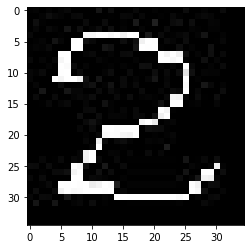

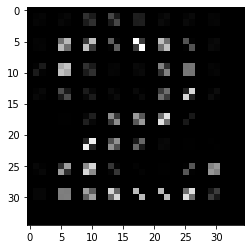

[0.0493737  0.         0.         ... 0.00425019 0.00793875 0.00385393]


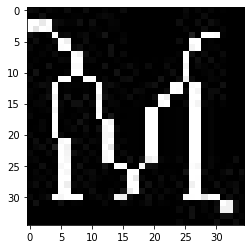

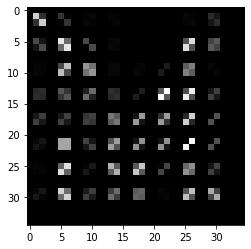

[0.00767146 0.         0.20613937 ... 0.17687743 0.31019486 0.26278017]


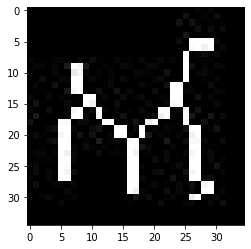

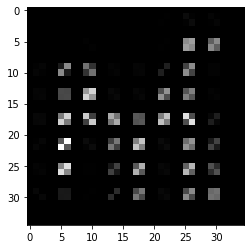

[0.         0.         0.         ... 0.00596851 0.29223944 0.13693362]


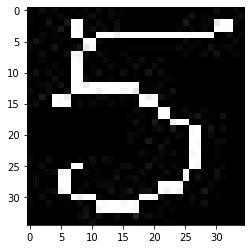

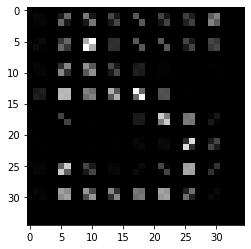

[0.07209853 0.         0.         ... 0.00415776 0.00415776 0.        ]


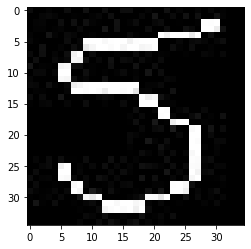

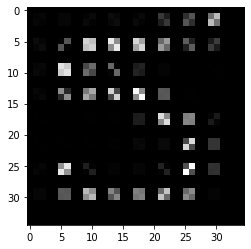

[0.06666286 0.12593807 0.07166961 ... 0.         0.0081344  0.00917413]


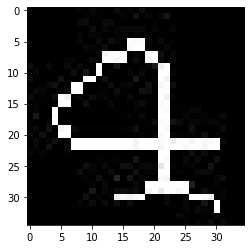

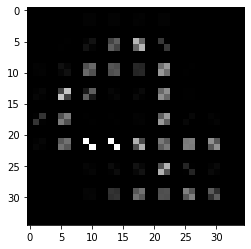

[0.         0.         0.         ... 0.31710094 0.01251221 0.00252785]


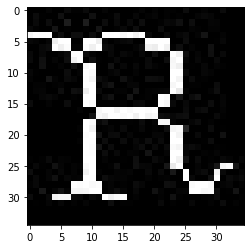

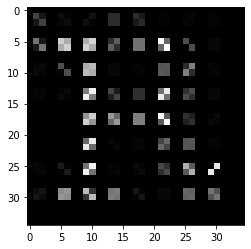

[0.01149638 0.         0.         ... 0.00718333 0.19320804 0.13266548]


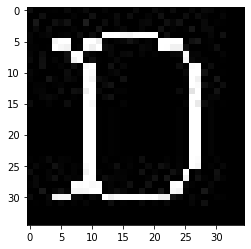

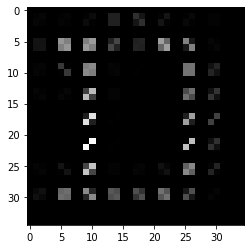

[0.02944588 0.04522928 0.03129892 ... 0.0041068  0.0041068  0.        ]


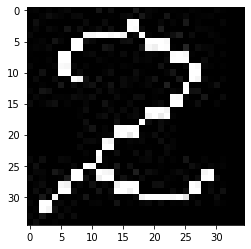

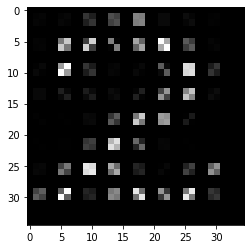

[0.04788565 0.         0.         ... 0.         0.00966141 0.16737676]


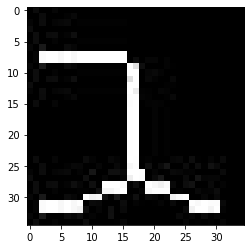

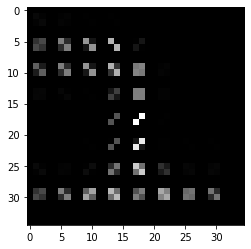

[0.05238942 0.         0.         ... 0.34412705 0.01367541 0.28069924]


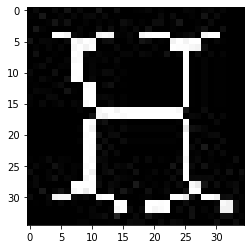

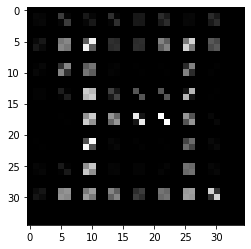

[0.07180182 0.00559875 0.         ... 0.18835494 0.28702661 0.27731918]


In [9]:
#fe ex with hog
from skimage.feature import hog
import glob
pl_img = []
list_hog=[]
for img in glob.glob("extracted/*.jpeg"):
    n= cv2.imread(img)
    pl_img.append(n)
    im2arr = np.array(n)
    plt.imshow(n, cmap='gray')
    plt.show()
    
    #fd, hog_image = hog(n,orientations=1,pixels_per_cell=(8,8),cells_per_block=(3,3),block_norm='L2-Hys',visualize=False,transform_sqrt=False,feature_vector=True,multichannel=None)
    H, hog_image = hog(n, orientations=8, pixels_per_cell=(4,4),cells_per_block=(2, 2), visualize=True, multichannel=None, feature_vector=True)
    #plt.axis("off")
    #hog_image = exposure.rescale_intensity(hog_image, out_range=(0, 255)).astype("uint8")
    plt.imshow(hog_image, cmap="gray")
    plt.show()
    list_hog.append(hog_image)
    #np.save('hog_features.npy',H) 
    print(H)
    with open("csv/hog_fea.csv", 'a') as f:
        writer = csv.writer(f)
        writer.writerow(H)

In [8]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [14]:
digits = datasets.load_digits()

In [12]:
print(len(list_hog))
data11 = np.dstack(list_hog)
print(data11.shape)
data11 = np.rollaxis(data11, -1)
print(data11.shape)

11
(35, 35, 11)
(11, 35, 35)


In [13]:
n_samples = len(list_hog)
data = data11.reshape((n_samples, -1))

In [15]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

ValueError: Found input variables with inconsistent numbers of samples: [11, 1797]